#시계열자료분석

##CH04 분해법 -02

### 패키지설치

In [ ]:
install.packages("forecast")
install.packages("TTR")
install.packages("lmtest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(forecast)
library(TTR)
library(lmtest)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [ ]:
options(repr.plot.width=15,repr.plot.height=8)

###단순이동평균과 중심이동평균

In [ ]:
z=scan("mindex.txt")
mindex=ts(z,start=c(1986,1),frequency=12)
mindex

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1986,9.3,10.7,13.3,14.1,17.8,18.1,19.4,18.8,19.1,18.4,18.0,17.0
1987,19.5,20.1,19.4,15.7,15.6,16.1,14.9,16.0,14.6,18.3,18.2,23.0
1988,22.2,22.1,18.8,17.7,13.8,12.7,16.5,15.6,16.3,10.7,10.4,7.0
1989,4.7,4.5,4.0,6.0,6.2,5.7,4.4,4.2,5.0,5.8,6.4,4.9
1990,7.9,8.2,11.8,10.0,11.1,11.7,12.4,15.2,14.0,15.2,12.9,18.0
1991,14.4,12.7,8.3,11.5,11.9,11.6,10.3,8.5,11.6,12.3,14.5,11.1
1992,11.8,12.4,12.7,9.8,10.0,10.2,9.6,6.9,5.3,4.8,4.6,1.9
1993,3.8,4.7,7.7,7.0,7.2,7.8,8.6,11.4,10.7,11.8,11.3,16.0
1994,13.2,12.0,8.5,11.4,,,,,,,,


- 단순이동평균 Simple Moving Average

In [ ]:
SMA(mindex,n=5)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1986,NA,NA,NA,NA,13.04,14.80,16.54,17.64,18.64,18.76,18.74,18.26
1987,18.40,18.60,18.80,18.34,18.06,17.38,16.34,15.66,15.44,15.98,16.40,18.02
1988,19.26,20.76,20.86,20.76,18.92,17.02,15.90,15.26,14.98,14.36,13.90,12.00
1989,9.82,7.46,6.12,5.24,5.08,5.28,5.26,5.30,5.10,5.02,5.16,5.26
1990,6.00,6.64,7.84,8.56,9.80,10.56,11.40,12.08,12.88,13.70,13.94,15.06
1991,14.90,14.64,13.26,12.98,11.76,11.20,10.72,10.76,10.78,10.86,11.44,11.60
1992,12.26,12.42,12.50,11.56,11.34,11.02,10.46,9.30,8.40,7.36,6.24,4.70
1993,4.08,3.96,4.54,5.02,6.08,6.88,7.66,8.40,9.14,10.06,10.76,12.24
1994,12.60,12.86,12.20,12.22,,,,,,,,


- 중심이동평균 (Center Simple Moving Average)

In [ ]:
ma(mindex,order=5,centre=TRUE)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1986,NA,NA,13.04,14.80,16.54,17.64,18.64,18.76,18.74,18.26,18.40,18.60
1987,18.80,18.34,18.06,17.38,16.34,15.66,15.44,15.98,16.40,18.02,19.26,20.76
1988,20.86,20.76,18.92,17.02,15.90,15.26,14.98,14.36,13.90,12.00,9.82,7.46
1989,6.12,5.24,5.08,5.28,5.26,5.30,5.10,5.02,5.16,5.26,6.00,6.64
1990,7.84,8.56,9.80,10.56,11.40,12.08,12.88,13.70,13.94,15.06,14.90,14.64
1991,13.26,12.98,11.76,11.20,10.72,10.76,10.78,10.86,11.44,11.60,12.26,12.42
1992,12.50,11.56,11.34,11.02,10.46,9.30,8.40,7.36,6.24,4.70,4.08,3.96
1993,4.54,5.02,6.08,6.88,7.66,8.40,9.14,10.06,10.76,12.24,12.60,12.86
1994,12.20,12.22,NA,NA,,,,,,,,


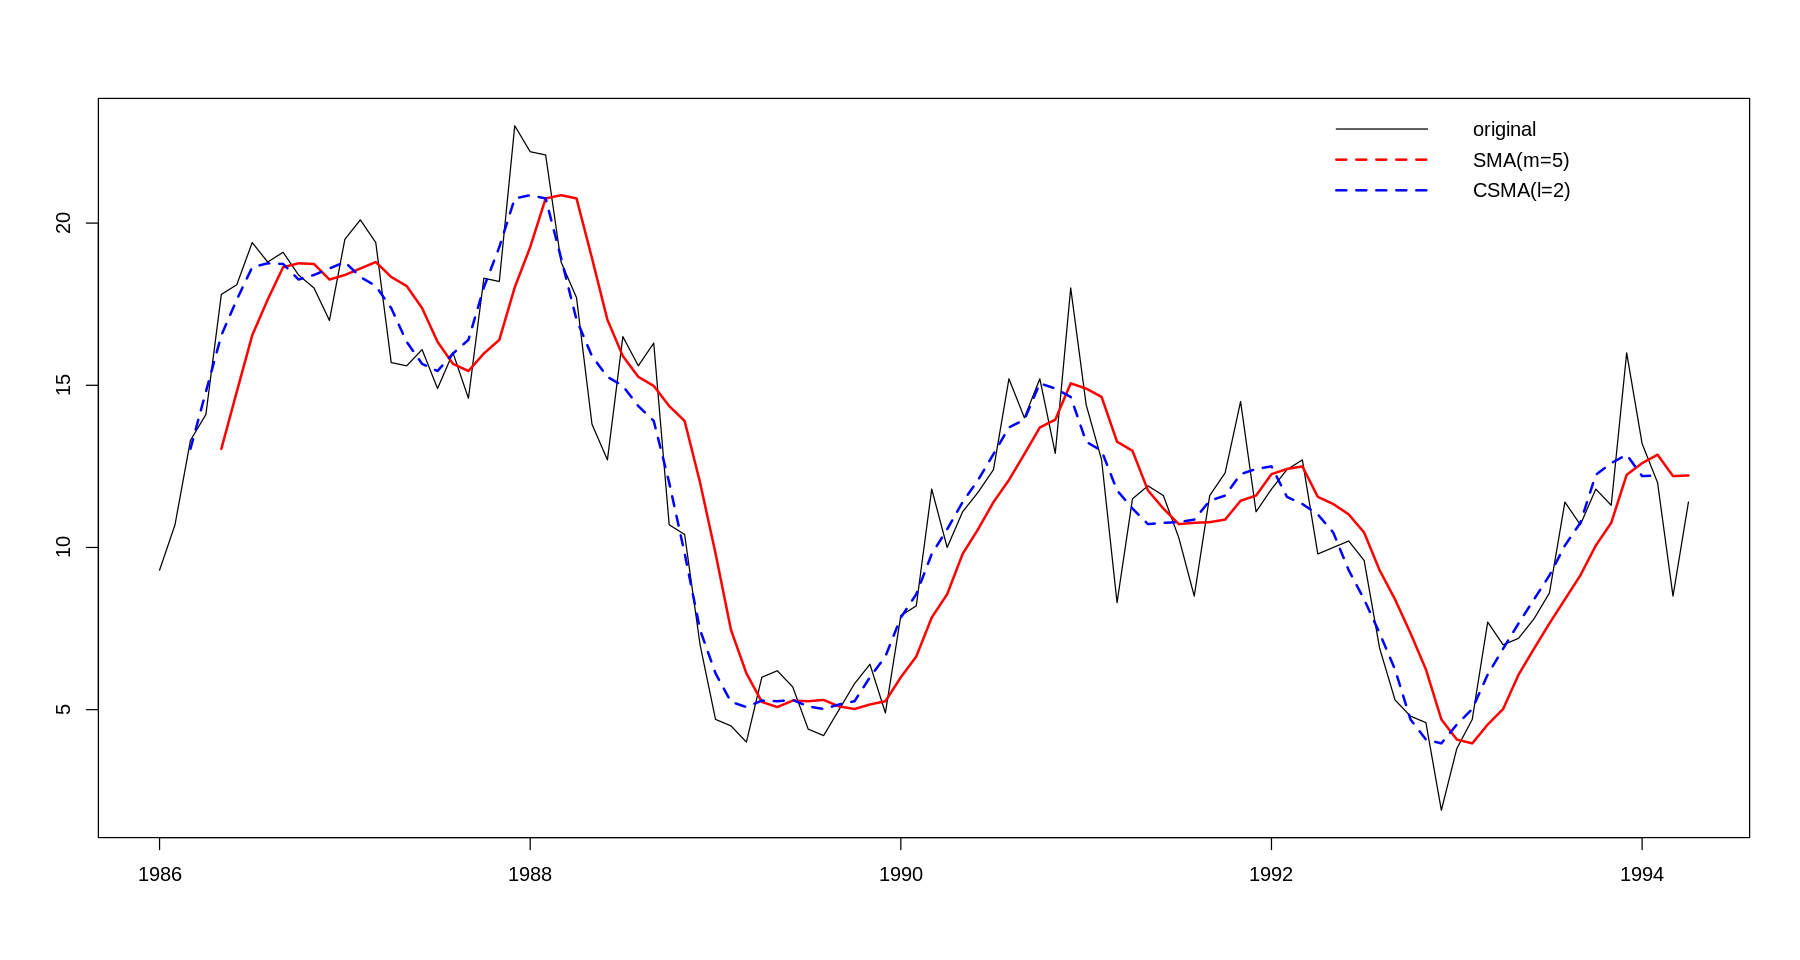

In [ ]:
plot.ts(mindex,ylab="",xlab="")
lines(SMA(mindex,n=5),col="red",lwd=2)
lines(ma(mindex,order=5,centre=TRUE),col="blue",lty=2,lwd=2)
legend("topright",lty=c(1,2,2),col=c("black","red","blue"),lwd=c(1,2,2),c("original","SMA(m=5)","CSMA(l=2)"),bty="n")

### 이동평균을 이용한 분해법

In [ ]:
z=scan("food.txt")
t=1:length(z)
food=ts(z,start=c(1981,1),frequency = 12)
log_food=log(food) ##이분산성 제거를 위한 로그변환

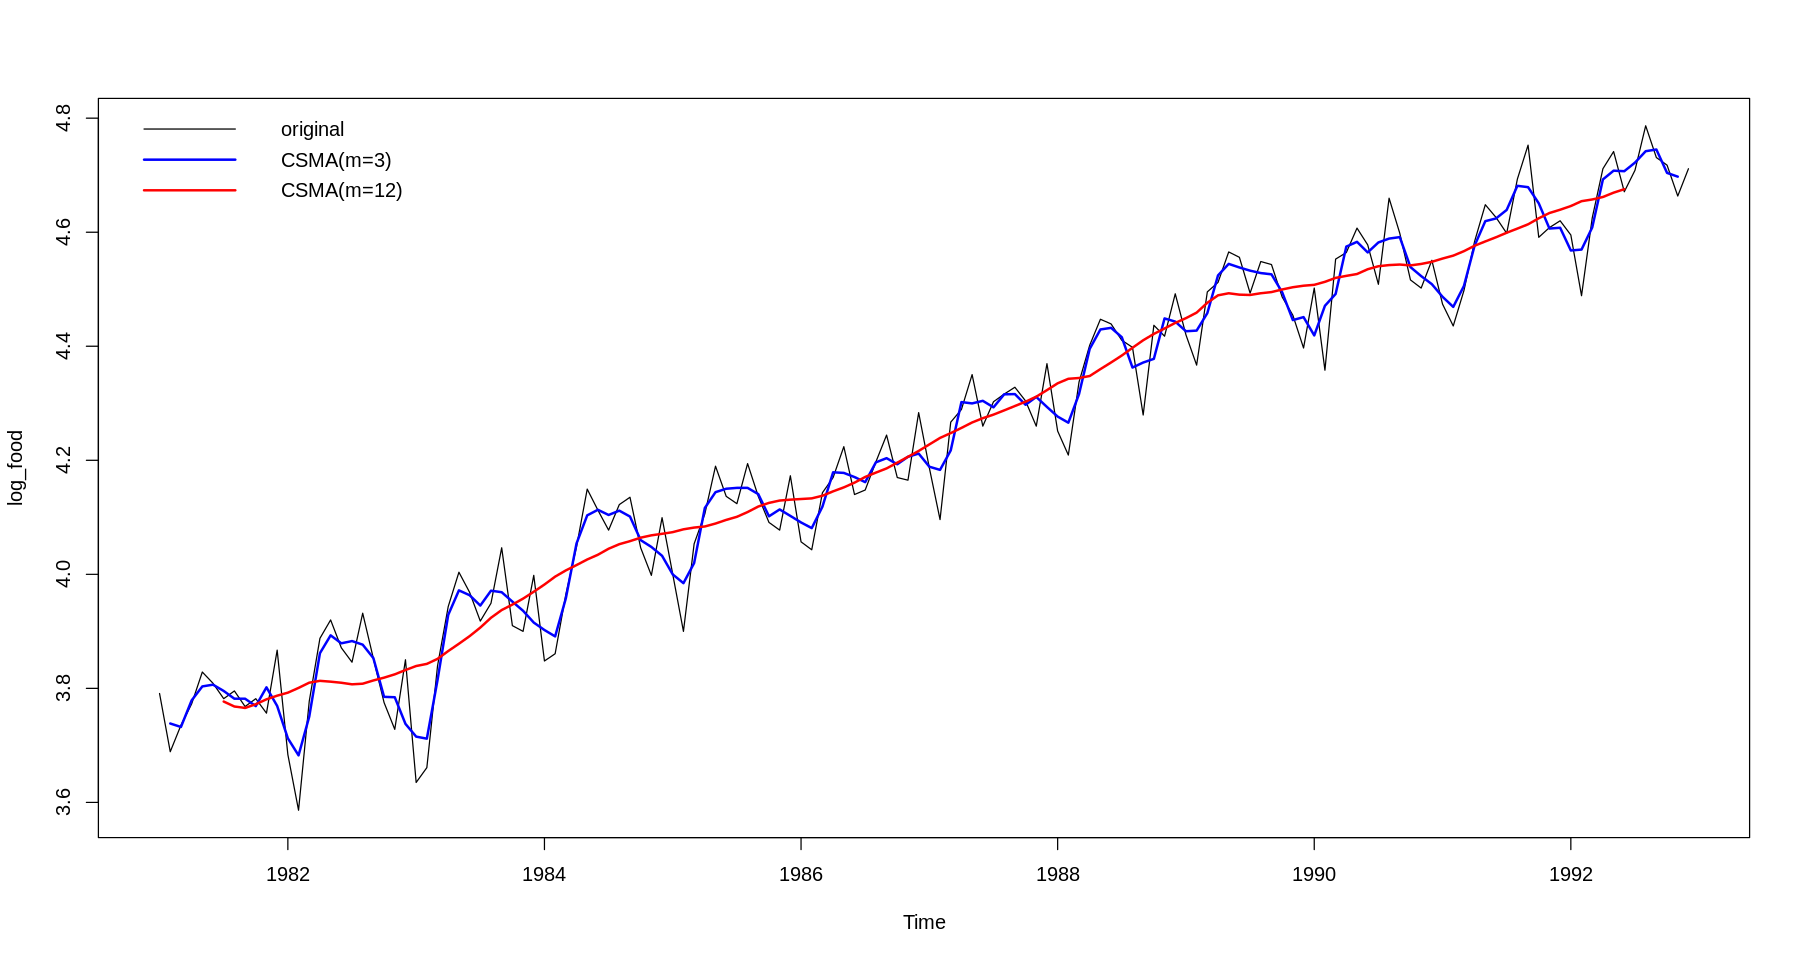

In [ ]:
plot.ts(log_food)
lines(ma(log_food,3),col="blue",lwd=2)
lines(ma(log_food,12),col="red",lwd=2)
legend("topleft",lty=c(1,1,1),col=c("black","blue","red"),lwd=c(1,2,2),c("original","CSMA(m=3)","CSMA(m=12)"),bty="n")

- m값을 12로 설정하면 계절성분이 거의 사라지고 추세성분만 남아있음을 볼 수 있음

### 1. 추세성분 : 계절주기와 동일한 m을 이용한 중심이동평균

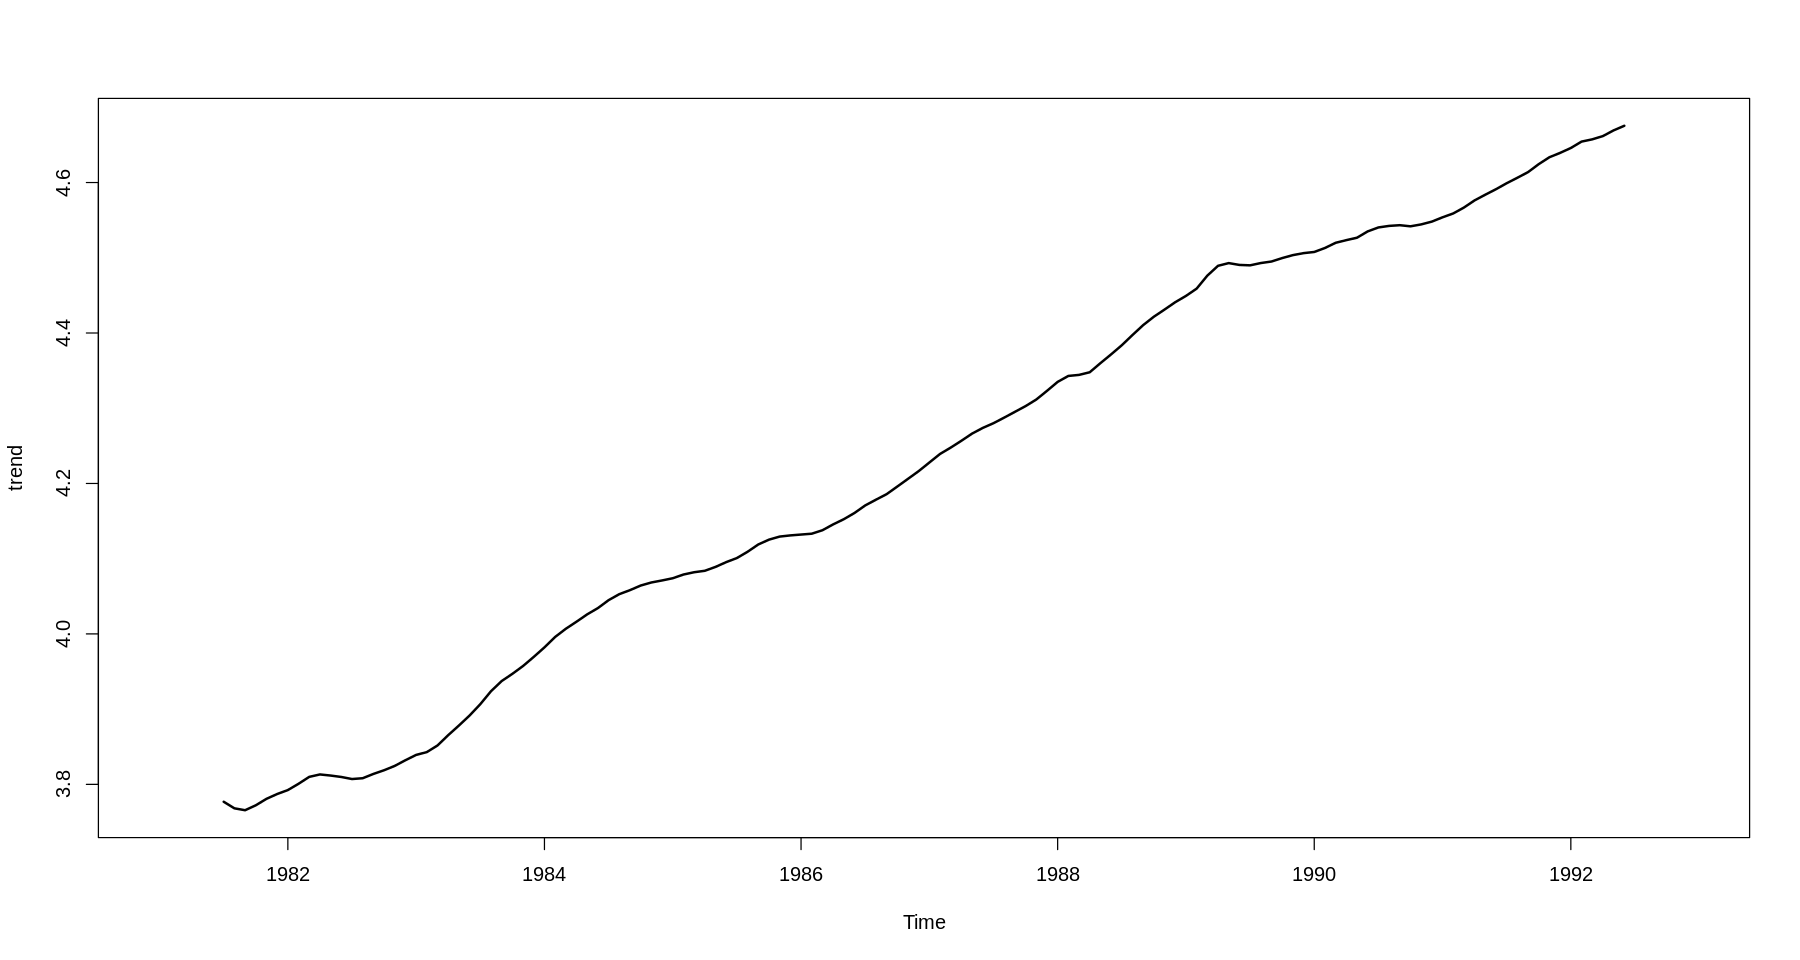

In [ ]:
trend=ma(log_food,12)
plot.ts(trend,lwd=2)

### 2. 계절성분: $Z_t-T̂_t$ (추세가 조정된 시계열에서) 각 계절성분의 평균을 구한 후, 평균을 0으로 조정

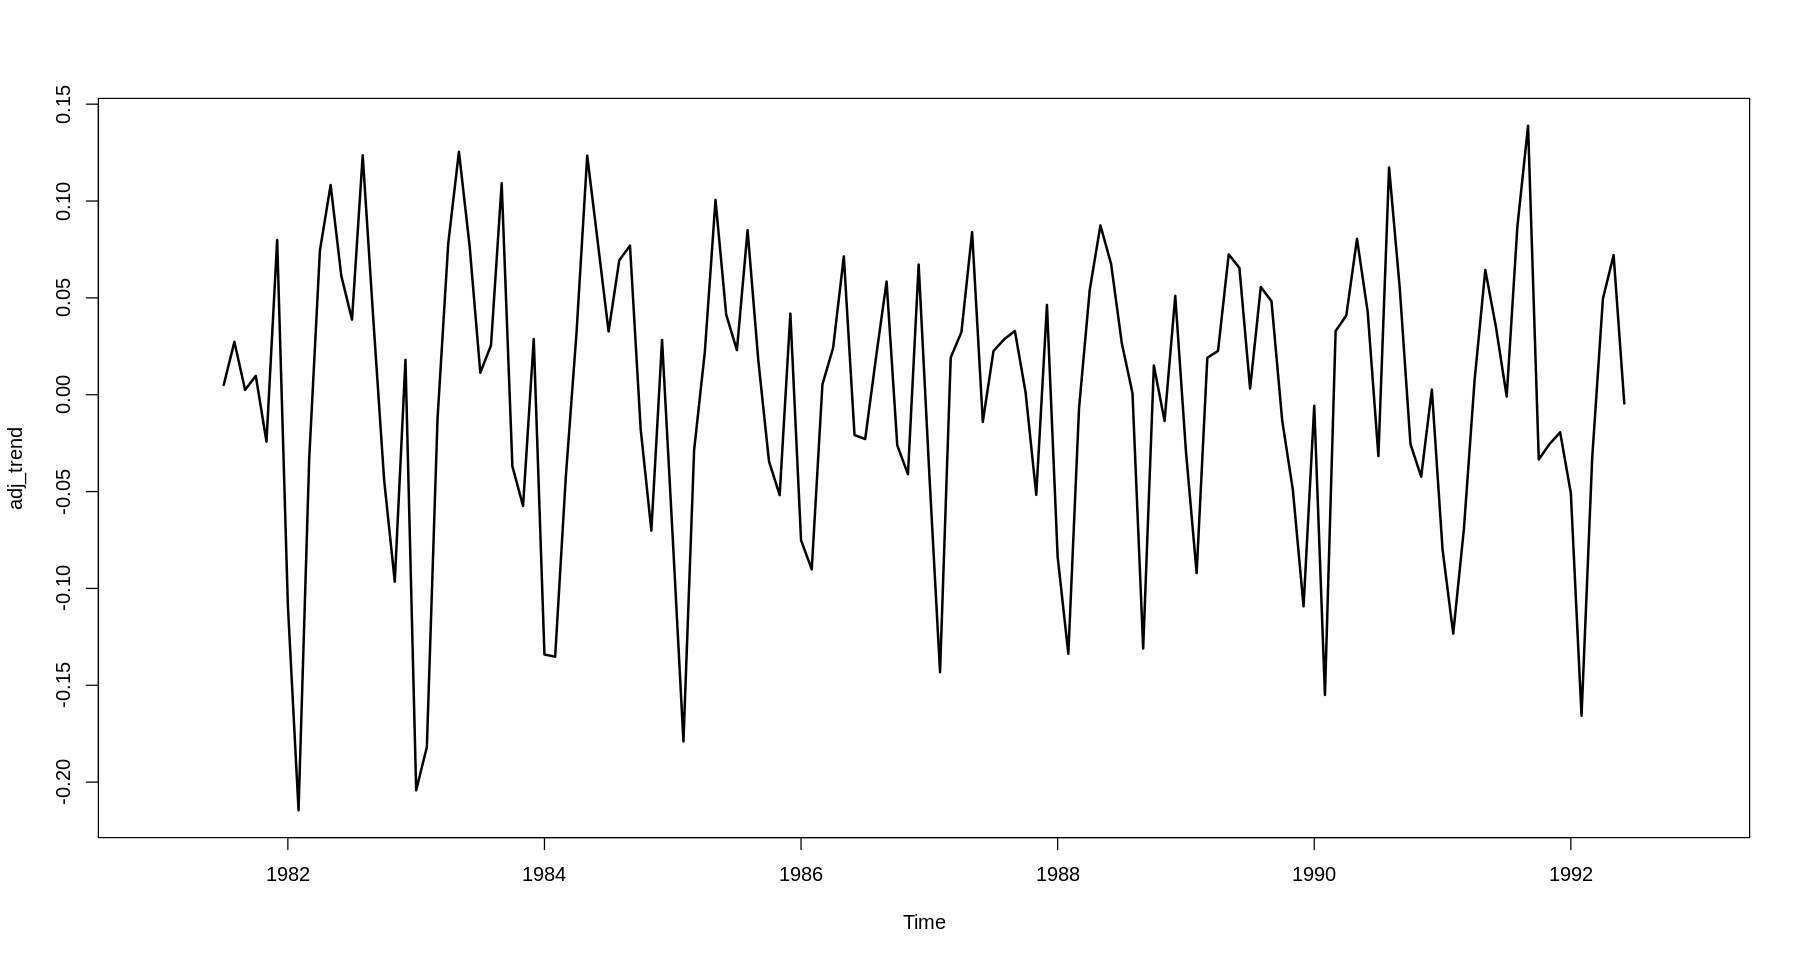

In [ ]:
adj_trend=log_food-trend
plot.ts(adj_trend,lwd=2)

In [ ]:
seasonal=tapply(adj_trend,cycle(adj_trend),function(y) mean(y,na.rm=T))
seasonal

1           2           3           4           5           6 
-0.08058938 -0.14673108 -0.01343221  0.03980949  0.08999456  0.03899139 
          7           8           9          10          11          12 
 0.00979449  0.05807463  0.04065427 -0.01862471 -0.04758747  0.02139864

In [ ]:
summary(lm(adj_trend~0+as.factor(cycle(adj_trend))))


Call:
lm(formula = adj_trend ~ 0 + as.factor(cycle(adj_trend)))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.171707 -0.018376  0.001116  0.023348  0.098197 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
as.factor(cycle(adj_trend))1  -0.080589   0.011748  -6.860 3.22e-10 ***
as.factor(cycle(adj_trend))2  -0.146731   0.011748 -12.489  < 2e-16 ***
as.factor(cycle(adj_trend))3  -0.013432   0.011748  -1.143 0.255181    
as.factor(cycle(adj_trend))4   0.039809   0.011748   3.388 0.000951 ***
as.factor(cycle(adj_trend))5   0.089995   0.011748   7.660 5.28e-12 ***
as.factor(cycle(adj_trend))6   0.038991   0.011748   3.319 0.001197 ** 
as.factor(cycle(adj_trend))7   0.009794   0.011748   0.834 0.406115    
as.factor(cycle(adj_trend))8   0.058075   0.011748   4.943 2.52e-06 ***
as.factor(cycle(adj_trend))9   0.040654   0.011748   3.460 0.000748 ***
as.factor(cycle(adj_trend))10 -0.018625   0.011748  -1.585 0.115531    
as.factor(cycl

In [ ]:
seasonal=seasonal-mean(seasonal) ##평균을 0으로 수정
seasonal

1           2           3           4           5           6 
-0.07990209 -0.14604380 -0.01274493  0.04049678  0.09068184  0.03967867 
          7           8           9          10          11          12 
 0.01048177  0.05876191  0.04134155 -0.01793742 -0.04690019  0.02208592

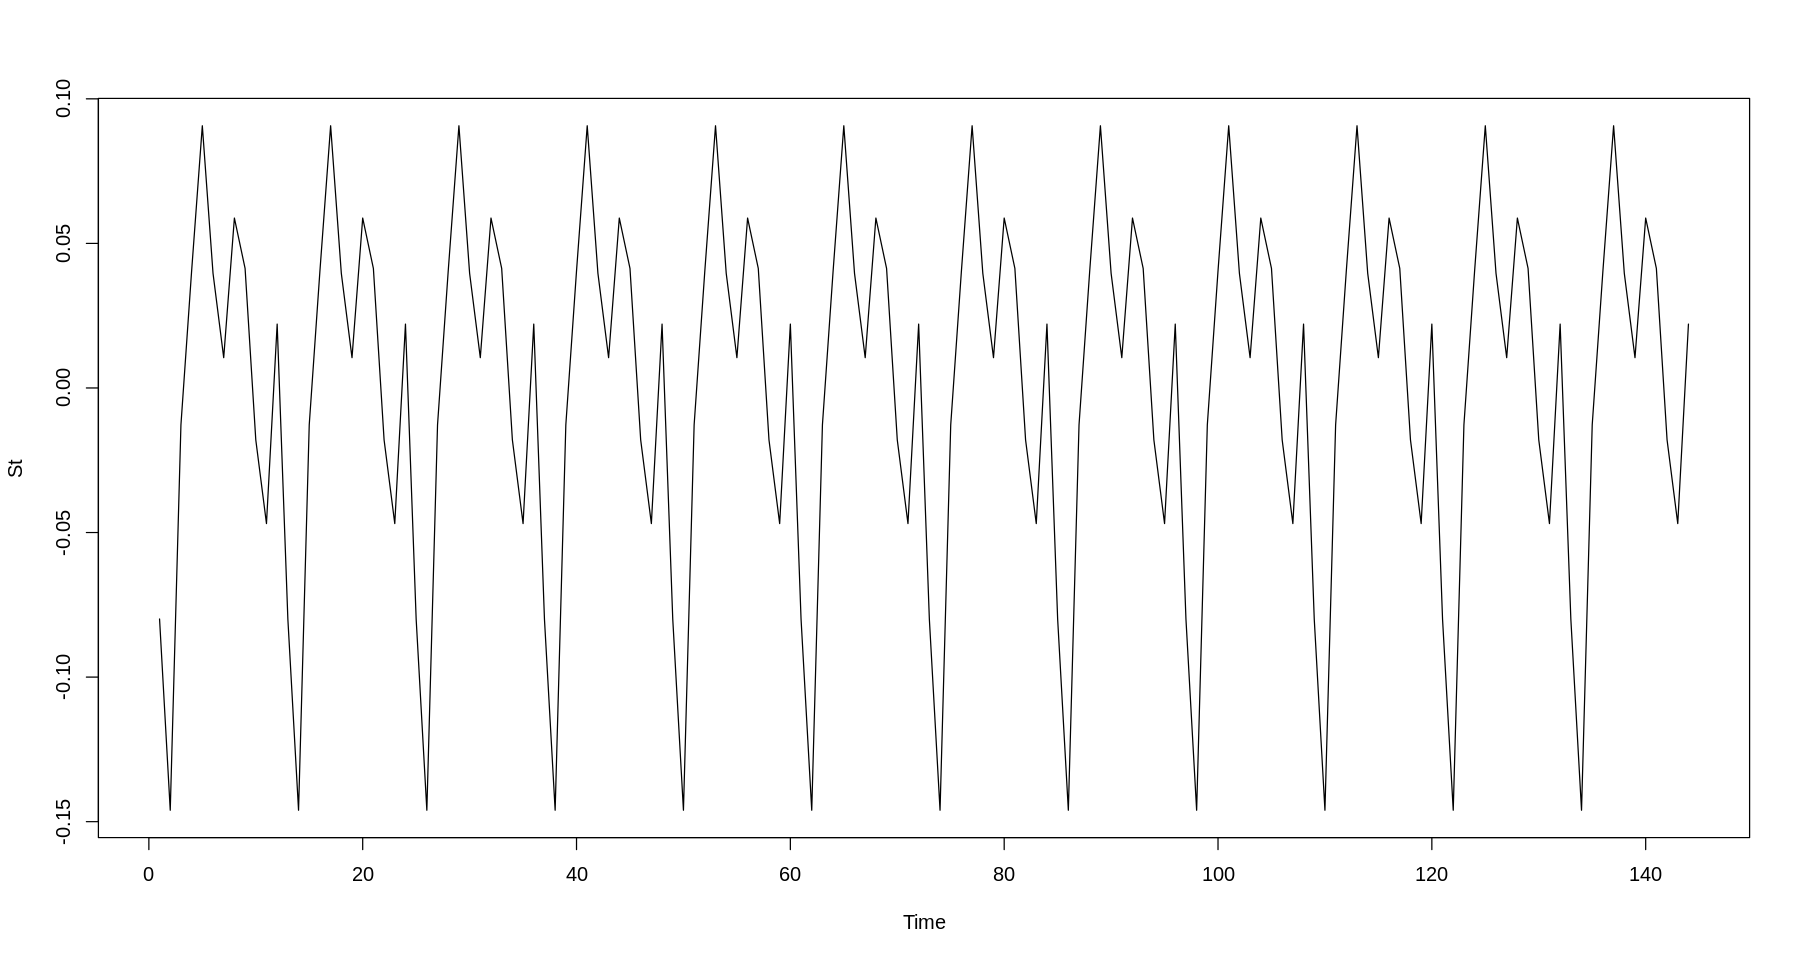

In [ ]:
St=rep(seasonal,12)
plot.ts(St)

### 3.불규칙 성분 : $Î_t=Z_t-T̂_t-Ŝ_t$

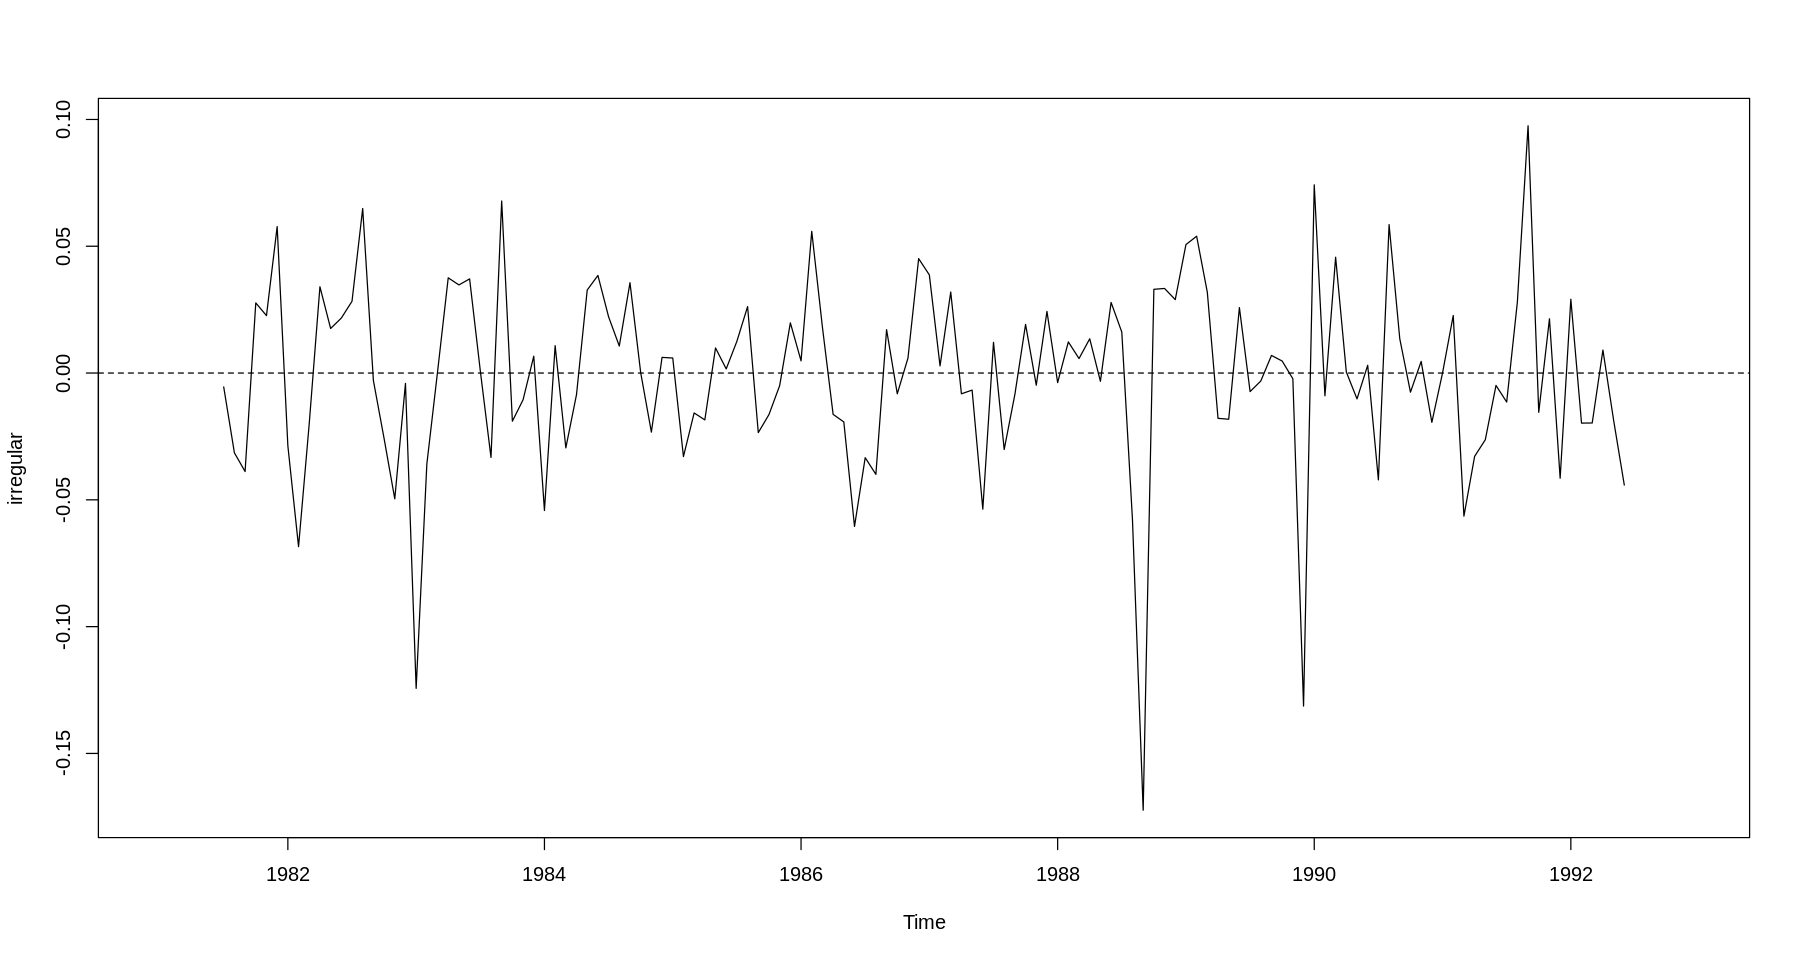

In [ ]:
irregular=log_food-trend-St
plot.ts(irregular)
abline(h=0,lty=2)

In [ ]:
t.test(irregular)


	One Sample t-test

data:  irregular
t = -0.21173, df = 131, p-value = 0.8326
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.007108577  0.005734014
sample estimates:
    mean of x 
-0.0006872817 


In [ ]:
dwtest(lm(irregular~1))


	Durbin-Watson test

data:  lm(irregular ~ 1)
DW = 1.7816, p-value = 0.1031
alternative hypothesis: true autocorrelation is greater than 0


###4.추정 : $Ẑ_t=T̂_t+Ŝ_t$

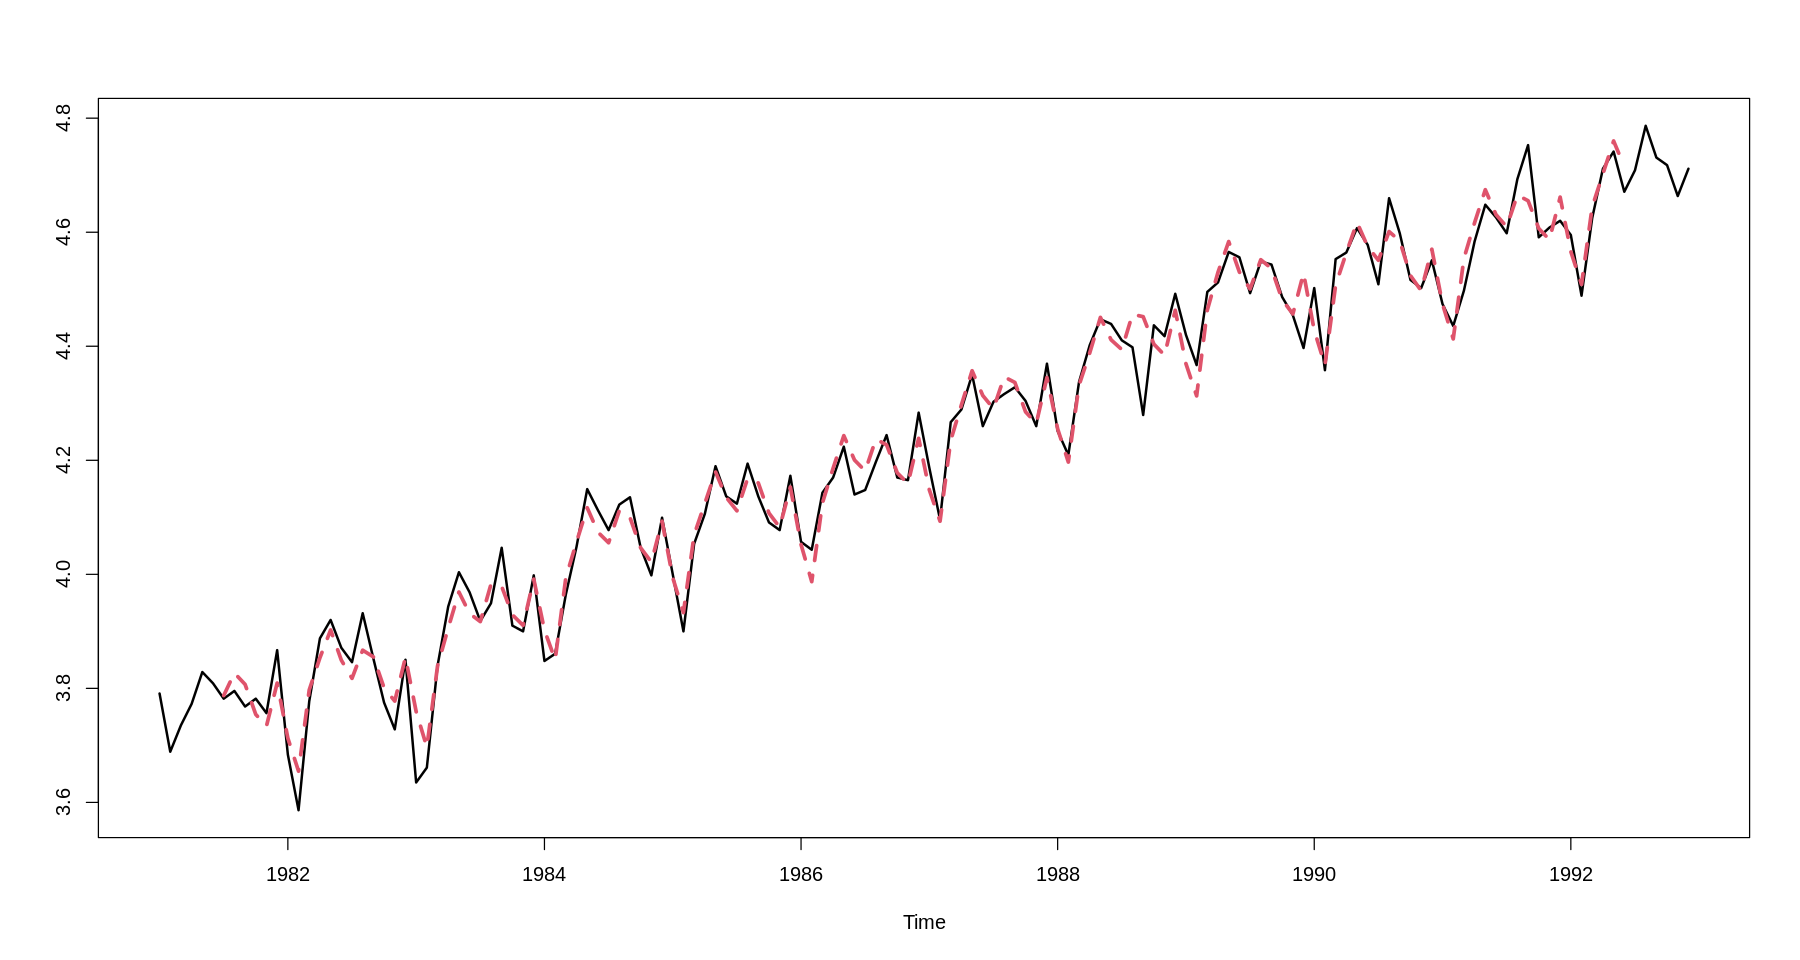

In [ ]:
fit_=trend+St
ts.plot(log_food,fit_,lty=1:2,col=1:2,lwd=2:3)

### decompose 함수를 이용한 분해법

- 위에서 설명한 평활법을 이용한 분해법과 동일

In [ ]:
dec_fit=decompose(log_food,"additive")

- 가법모형

In [ ]:
##비교 - Trend
trend[1:15]
dec_fit$trend[1:15]

[1]       NA       NA       NA       NA       NA       NA 3.776909 3.768171
 [9] 3.765650 3.772193 3.780789 3.787192 3.792454 3.800800 3.809986

[1]       NA       NA       NA       NA       NA       NA 3.776909 3.768171
 [9] 3.765650 3.772193 3.780789 3.787192 3.792454 3.800800 3.809986

In [ ]:
##비교 - Seasonal
St[1:12]
dec_fit$seasonal[1:12]

1           2           3           4           5           6 
-0.07990209 -0.14604380 -0.01274493  0.04049678  0.09068184  0.03967867 
          7           8           9          10          11          12 
 0.01048177  0.05876191  0.04134155 -0.01793742 -0.04690019  0.02208592

[1] -0.07990209 -0.14604380 -0.01274493  0.04049678  0.09068184  0.03967867
 [7]  0.01048177  0.05876191  0.04134155 -0.01793742 -0.04690019  0.02208592

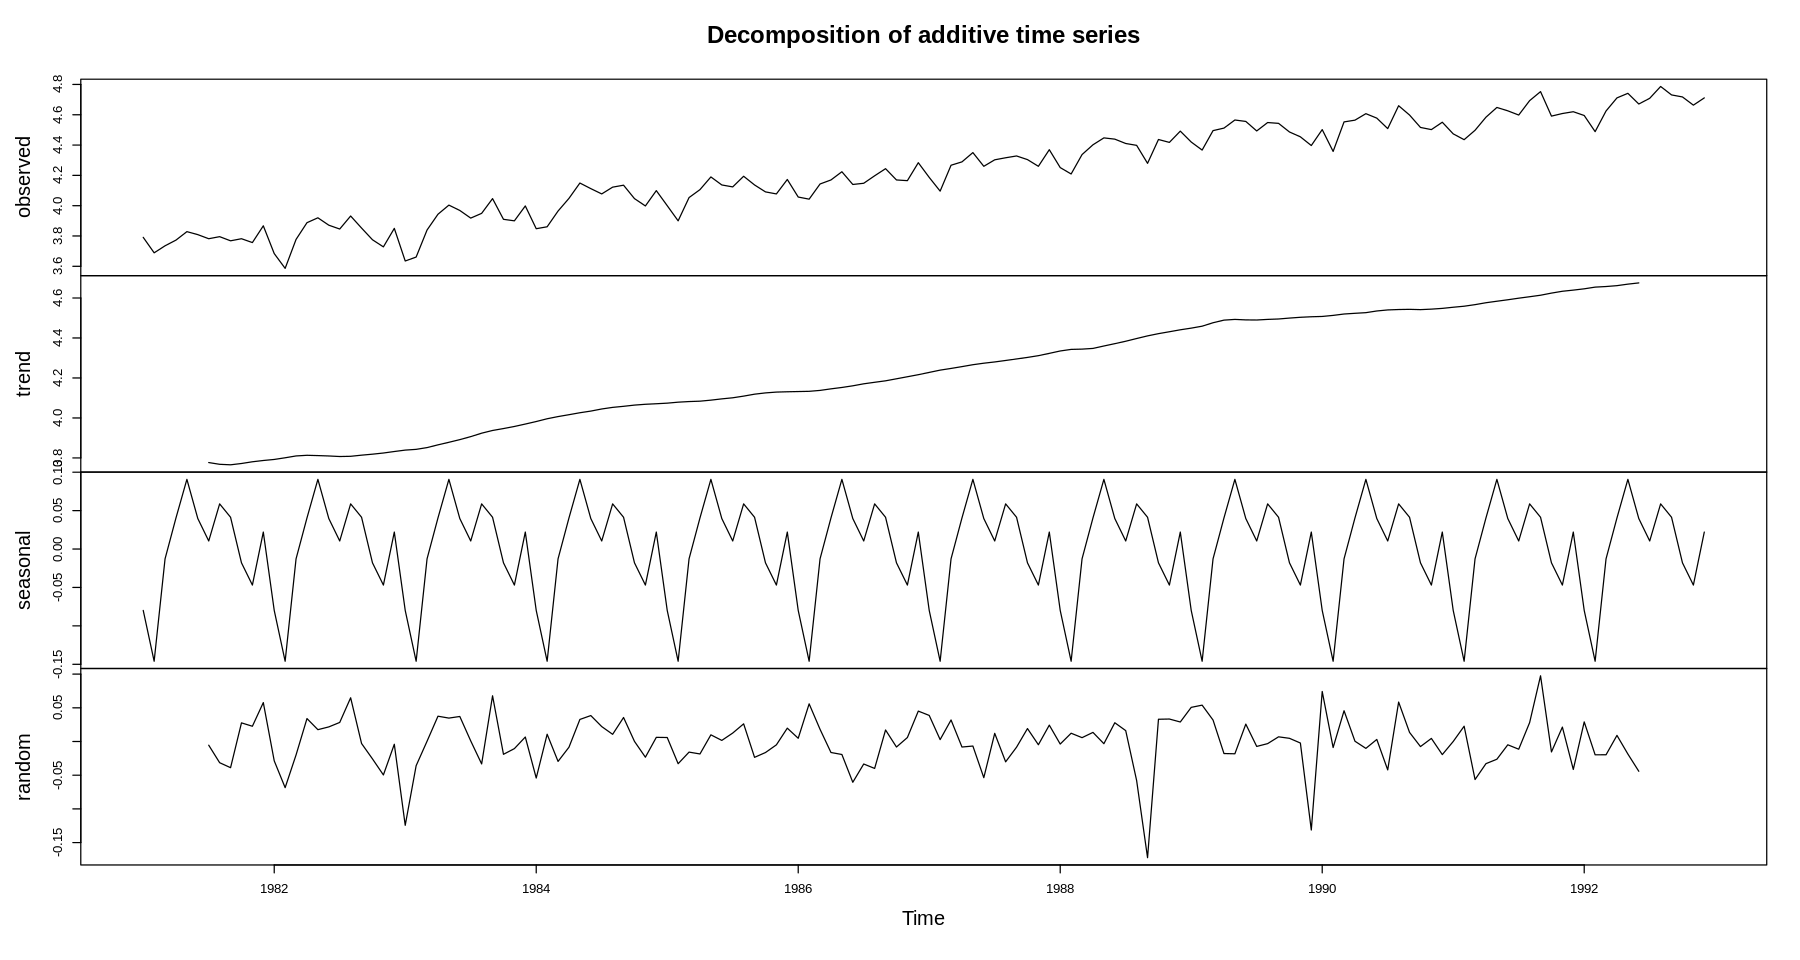

In [ ]:
plot(dec_fit)

- 첫번째 칸 : 관측된 원 시계열 데이터
- 두번째 칸 : 추세성분
- 세번째 칸 : 계절성분
- 네번째 칸 : 불규칙성분

In [ ]:
dec_fit2=decompose(food,type="multiplicative")

- 승법모형

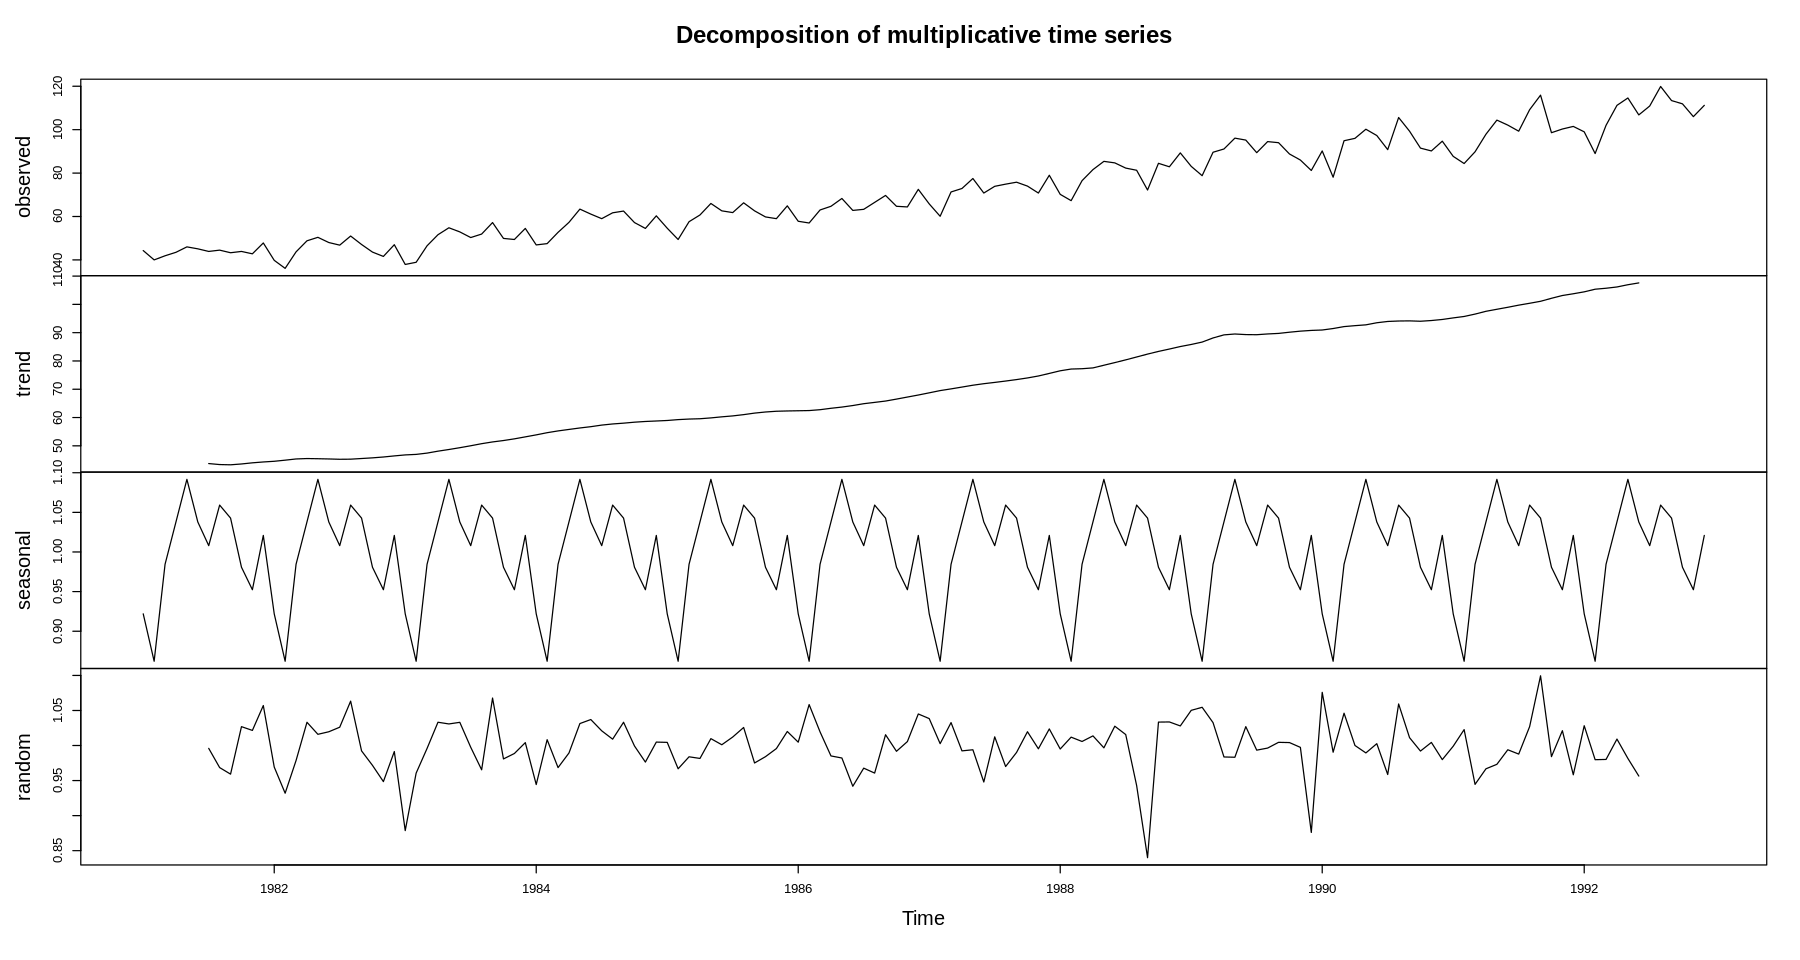

In [ ]:
plot(dec_fit2)

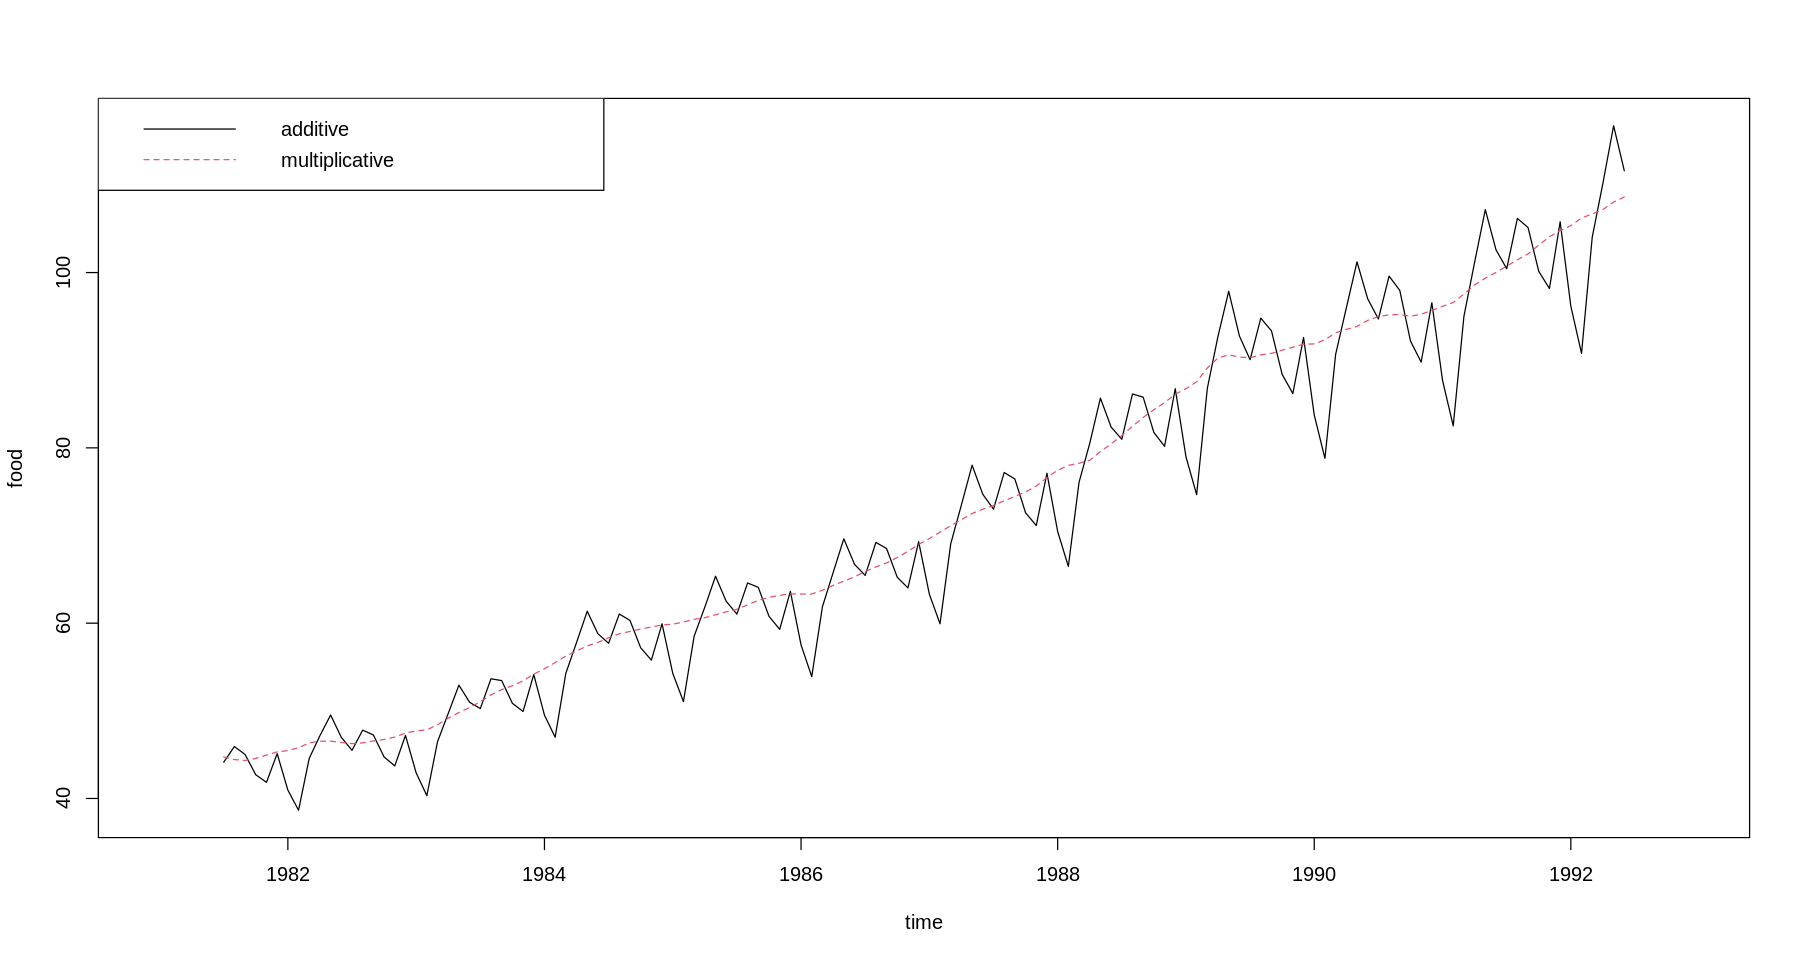

In [ ]:
##가법모형 vs 승법모형
pred_dec=dec_fit$trend+dec_fit$seasonal
pred_dec2=dec_fit2$trend+dec_fit2$seasonal

ts.plot(exp(pred_dec),pred_dec2,col=1:2,lty=1:2,xlab="time",ylab="food")
legend("topleft",lty=1:2,col=1:2,c("additive","multiplicative"))


In [ ]:
sum((food-exp(pred_dec))^2,na.rm=T) ##SSE
sum((food-pred_dec)^2,na.rm=T)

[1] 1023.548

[1] 647627.8

### stl 함수를 이용한 분해법

In [ ]:
stl_fit1=stl(log_food,s.window=12) ##계절주기는 작성해주어야 함!

In [ ]:
head(stl_fit1$time.series)

,seasonal,trend,remainder
Jan 1981,-0.09035504,3.789108,0.09223150
Feb 1981,-0.14793139,3.787232,0.04957932
Mar 1981,-0.01989614,3.785355,-0.03017285
Apr 1981,0.03829580,3.783478,-0.04901299
May 1981,0.09453872,3.782254,-0.04815173
Jun 1981,0.04378729,3.781031,-0.01593573


In [ ]:
t.test(stl_fit1$time.series[,3])


	One Sample t-test

data:  stl_fit1$time.series[, 3]
t = -0.18, df = 143, p-value = 0.8574
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.006341435  0.005282903
sample estimates:
    mean of x 
-0.0005292661 


In [ ]:
dwtest(lm(stl_fit1$time.series[,3]~1),alternative="two.sided")


	Durbin-Watson test

data:  lm(stl_fit1$time.series[, 3] ~ 1)
DW = 1.64, p-value = 0.02962
alternative hypothesis: true autocorrelation is not 0


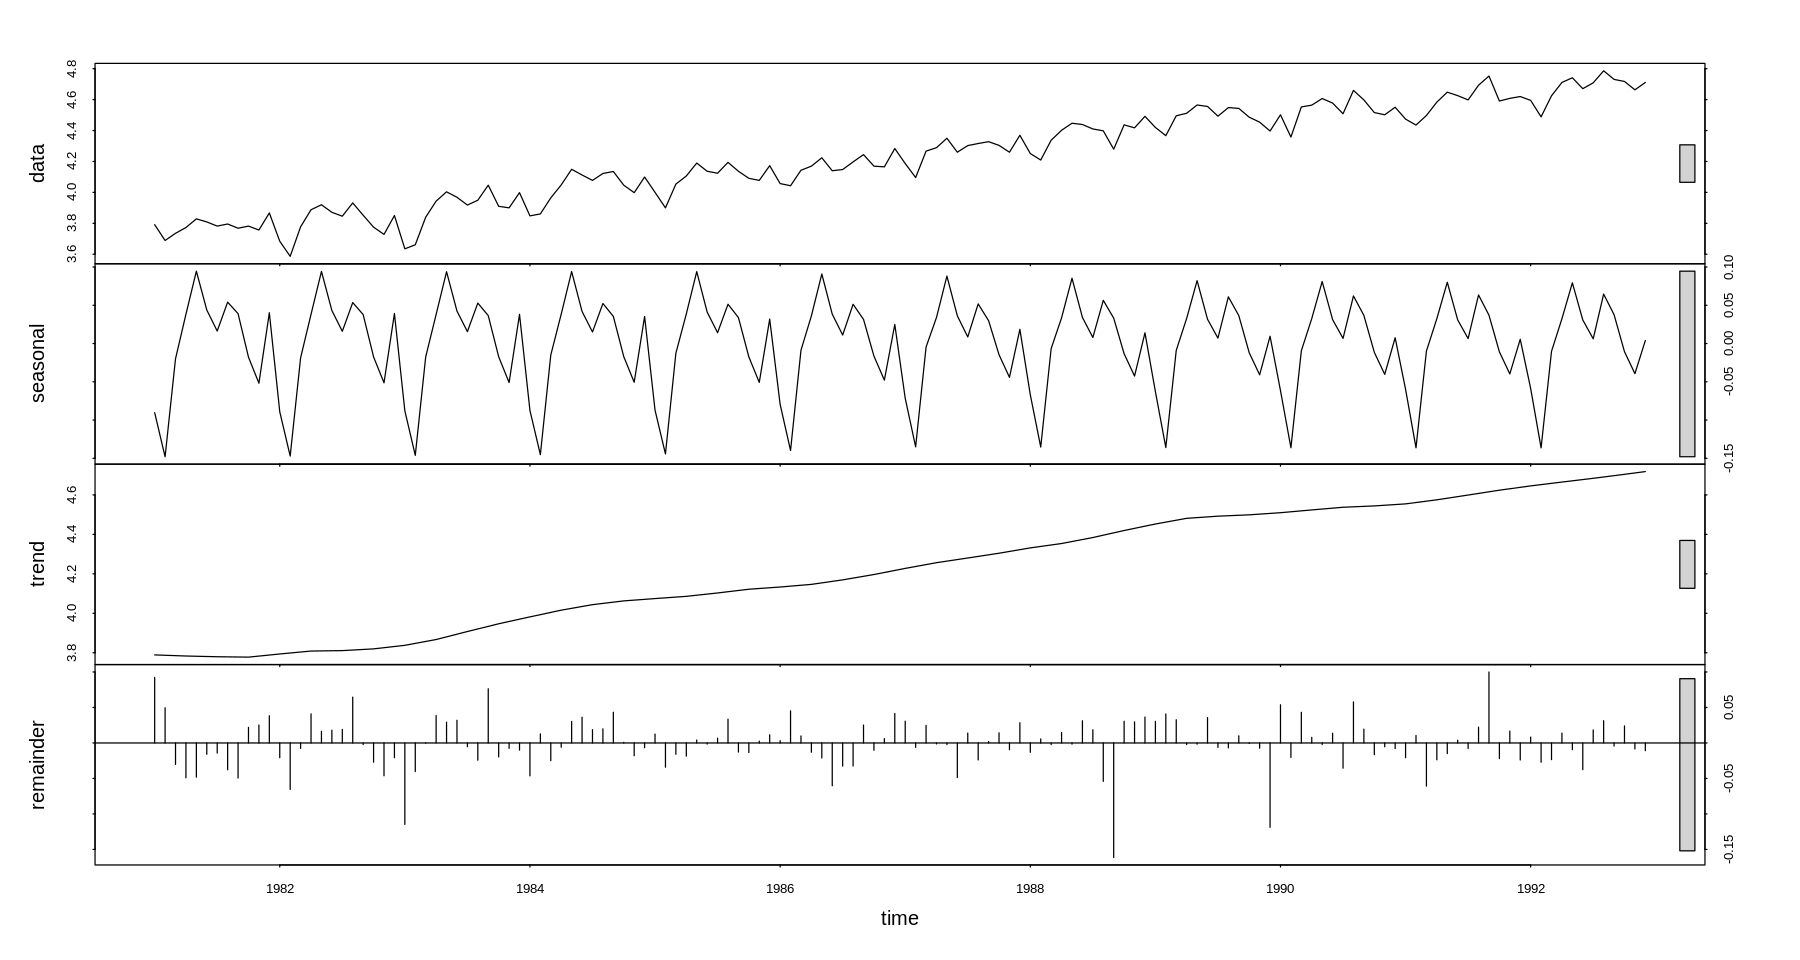

In [ ]:
plot(stl_fit1)

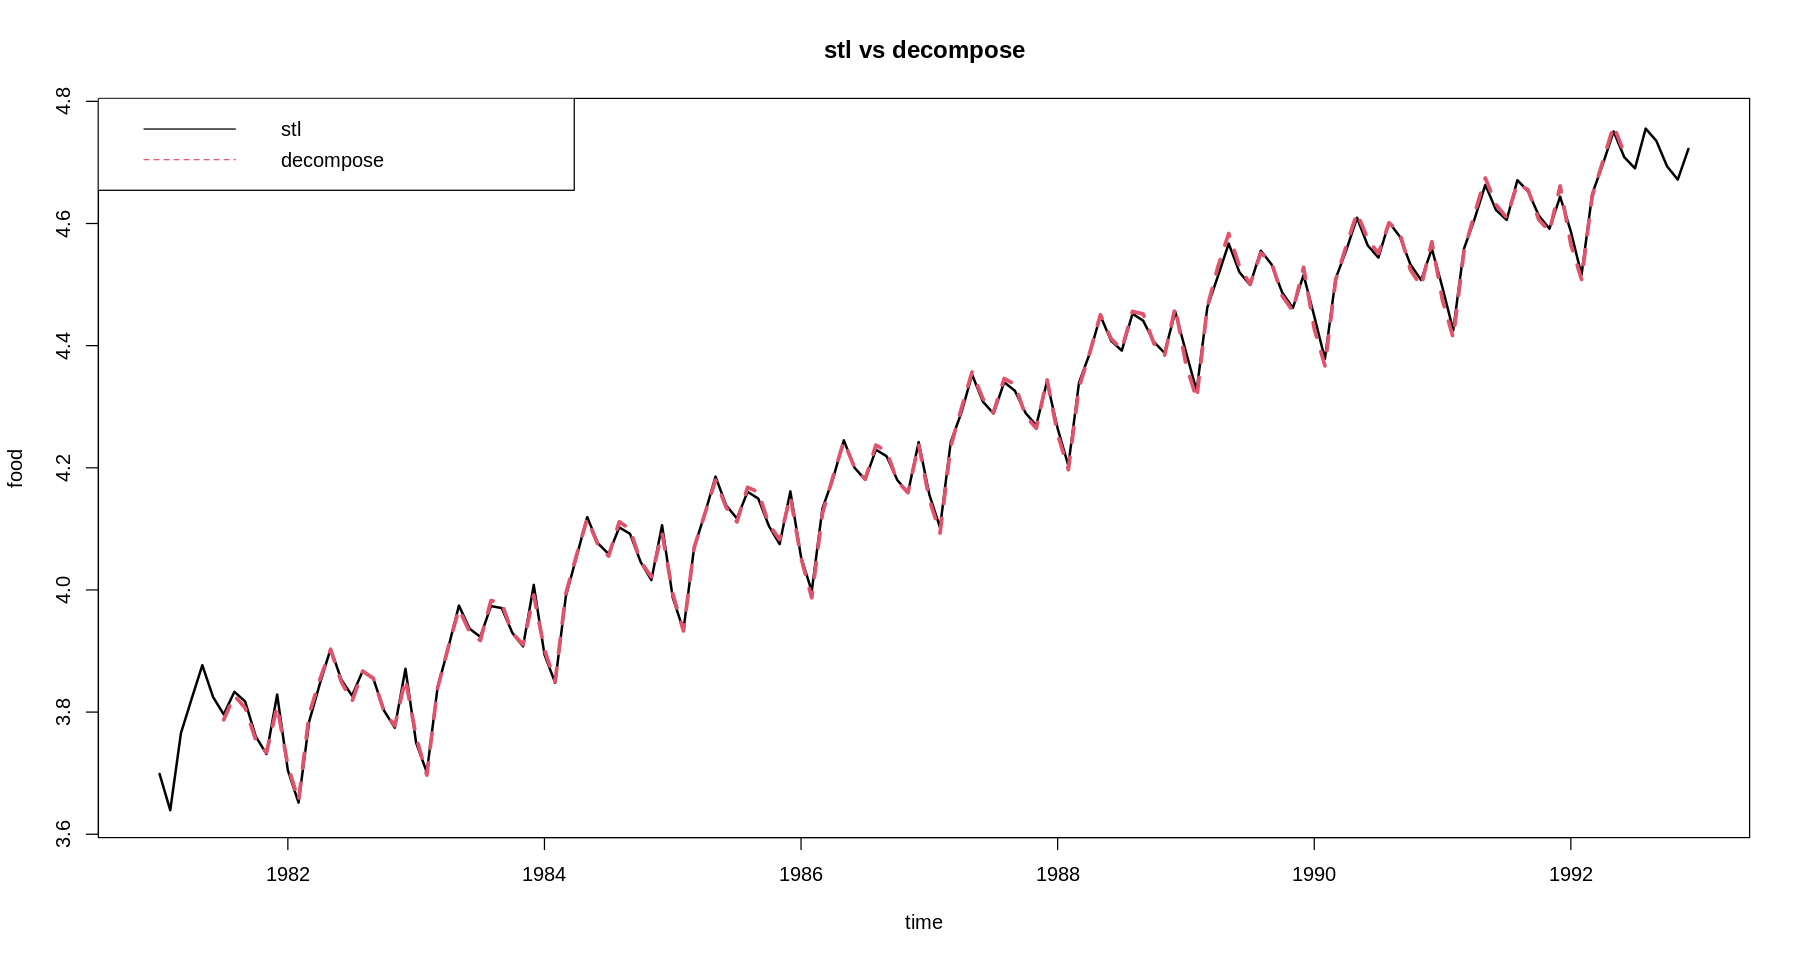

In [ ]:
##stl vs decompose
pred_stl=stl_fit1$time.series[,1]+stl_fit1$time.series[,2]

ts.plot(pred_stl,pred_dec,col=1:2,lty=1:2,lwd=2:3,xlab="time",ylab="food",main="stl vs decompose")
legend("topleft",lty=1:2,col=1:2,c("stl","decompose"))

In [ ]:
###MSE : 1-시차 후 예측 오차 제곱합의 평균
mean((log_food-pred_stl)^2)
mean((log_food-pred_dec)^2,na.rm=T)

[1] 0.00123661

[1] 0.001380727